# 決定木

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

## 【問題1】～【問題4】

In [2]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
    
    # 【問題1】不純度を求める関数
    def _calc_gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        return 1 - sum((i/len(y))**2 for i in counts)
    
    # 【問題2】情報利得を求める関数
    def _calc_gain(self, X, feature_index, y, threshold):
        labels_l = y[X[:, feature_index] < threshold]
        labels_r = y[X[:, feature_index] >= threshold]
        gain_l = len(labels_l) / len(y) * self._calc_gini(labels_l)
        gain_r = len(labels_r) / len(y) * self._calc_gini(labels_r)
        return self._calc_gini(y) - gain_l - gain_r
    
    # 【問題3】学習
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        self.gain = 0
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds[1:]:
                _gain = self._calc_gain(X, feature_index, y, threshold)
                if _gain > self.gain:
                    self.l_label = statistics.mode(y[X[:, feature_index] < threshold])
                    self.r_label = statistics.mode(y[X[:, feature_index] >= threshold])
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print(f'Feature:{self.feature} Threshold:{self.threshold} Gain:{self.gain}')
    
    # 【問題4】推定
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        return np.where(X[:, self.feature] < self.threshold, self.l_label, self.r_label)


## 【問題5】学習と推定

In [3]:
# Sample data 2
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
              [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
              [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
              [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
              [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
              [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
              [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
              [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
              [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
              [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
              [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
              [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
              [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
              [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
              [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
              [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
              [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
              [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
              [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
              [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=11)

In [5]:
clf1 = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf1.fit(X_train, y_train)

Feature:0 Threshold:-3.5944 Gain:0.018208165322580572
Feature:0 Threshold:0.96765 Gain:0.04063946759259253
Feature:1 Threshold:5.4681 Gain:0.052734375
Feature:1 Threshold:9.3444 Gain:0.05839170258620685


In [6]:
from sklearn import metrics

def evaluate(y_true, y_pred, title):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    confusion = metrics.confusion_matrix(y_true, y_pred)
    
    print(    
        f'--- {title} ---',
        f'accuracy:  {accuracy}',
        f'precision: {precision}',
        f'recall:    {recall}',
        f'f1:        {f1}',
        f'confusion matrix:\n{confusion}',
        sep='\n'
    )

In [7]:
y_pred = clf1.predict(X_test)
print(y_pred)
print(y_test)
evaluate(y_test, y_pred, 'Decesion Tree')

[0 1 0 0 0 0 0 0]
[1 1 0 0 0 1 1 1]
--- Decesion Tree ---
accuracy:  0.5
precision: 1.0
recall:    0.2
f1:        0.33333333333333337
confusion matrix:
[[3 0]
 [4 1]]


## 【問題6】決定領域の可視化

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['target 1', 'target 2']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

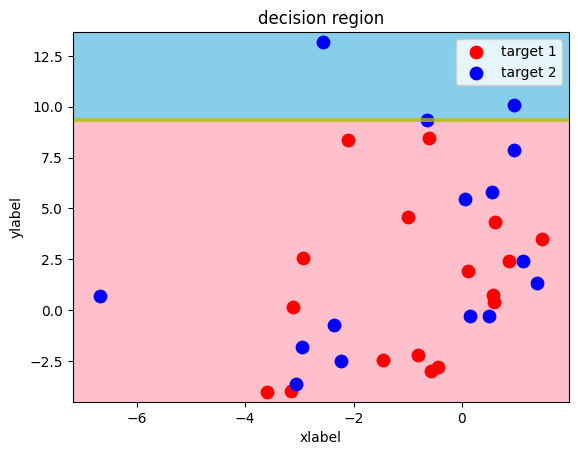

In [9]:
decision_region(X_train, y_train, clf1)

## 【問題7】【問題8】

In [10]:
class ScratchDecesionTreeClassifierDepthInf():
    
    def __init__(self, max_depth=None, verbose=False):
        self.max_depth = max_depth
        self.verbose = verbose
        self.prediction = False
        self.current_depth = 1
        
    def _update_depth(self, depth):
        self.current_depth += depth
    
    def _calc_gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        return 1 - sum((i/len(y))**2 for i in counts)
    
    def _calc_gain(self, X, feature_index, y, threshold):
        labels_l = y[X[:, feature_index] < threshold]
        labels_r = y[X[:, feature_index] >= threshold]
        gain_l = len(labels_l) / len(y) * self._calc_gini(labels_l)
        gain_r = len(labels_r) / len(y) * self._calc_gini(labels_r)
        return self._calc_gini(y) - gain_l - gain_r
    
    def fit(self, X, y):
        self.label = statistics.mode(y)
        
        if self.max_depth is not None:
            if self.current_depth > self.max_depth:
                return
        if self._calc_gini(y) <= 0:
            return
        
        self.prediction = True
        
        self.gain = 0
        for index in range(X.shape[1]):
            unique = np.unique(X[:, index])
            # 特徴量の値の中間をしきい値にする
            thresholds = [(unique[i] + unique[i+1]) / 2 for i in range(len(unique) - 1)]
            
            for thre in thresholds:
                _gain = self._calc_gain(X, index, y, thre)
                
                if _gain > self.gain:
                    self.feature_index = index
                    self.threshold = thre
                    self.gain = _gain
        
        l_X = X[X[:, self.feature_index] <  self.threshold]
        r_X = X[X[:, self.feature_index] >= self.threshold]
        l_y = y[X[:, self.feature_index] <  self.threshold]
        r_y = y[X[:, self.feature_index] >= self.threshold]
        
        if self.verbose:
            print(f'Feature: {self.feature_index}  Threshold: {self.threshold:<8.5}  Gain: {self.gain:<8.5}  Depth: {self.current_depth}  Label1: {l_y}  Label2: {r_y}')
        
        self.l_clf = ScratchDecesionTreeClassifierDepthInf(self.max_depth, self.verbose)
        self.r_clf = ScratchDecesionTreeClassifierDepthInf(self.max_depth, self.verbose)
        self.l_clf._update_depth(self.current_depth)
        self.r_clf._update_depth(self.current_depth)
        self.l_clf.fit(l_X, l_y)
        self.r_clf.fit(r_X, r_y)
    
    def predict(self, X):
        y = np.zeros(X.shape[0])
        
        l_X_index = X[:, self.feature_index] <  self.threshold
        r_X_index = X[:, self.feature_index] >= self.threshold
        
        if self.l_clf.prediction:
            y[l_X_index] = self.l_clf.predict(X[l_X_index])
        else:
            y[l_X_index] = self.l_clf.label
        
        if self.r_clf.prediction:
            y[r_X_index] = self.r_clf.predict(X[r_X_index])
        else:
            y[r_X_index] = self.r_clf.label
        
        return y


### 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成

Feature: 1  Threshold: 8.904     Gain: 0.058392  Depth: 1  Label1: [0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1]  Label2: [1 1 1]
Feature: 0  Threshold: 0.91528   Gain: 0.036171  Depth: 2  Label1: [0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0]  Label2: [0 1 1 1]
--- Decesion Tree ---
accuracy:  0.625
precision: 1.0
recall:    0.4
f1:        0.5714285714285715
confusion matrix:
[[3 0]
 [3 2]]


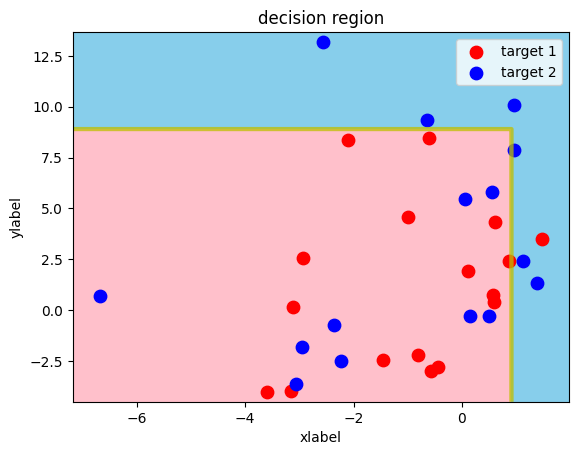

In [11]:
clf2 = ScratchDecesionTreeClassifierDepthInf(max_depth=2, verbose=True)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
evaluate(y_test, y_pred, 'Decesion Tree')

decision_region(X_train, y_train, clf2)

--- Decesion Tree ---
accuracy:  0.625
precision: 1.0
recall:    0.4
f1:        0.5714285714285715
confusion matrix:
[[3 0]
 [3 2]]


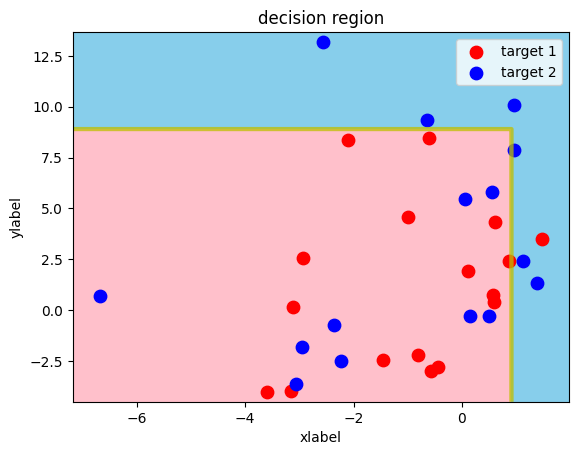

In [12]:
# scikit-learnと比較
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
evaluate(y_test, y_pred, 'Decesion Tree')

decision_region(X_train, y_train, clf)

### 【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成

Feature: 1  Threshold: 8.904     Gain: 0.058392  Depth: 1  Label1: [0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1]  Label2: [1 1 1]
Feature: 0  Threshold: 0.91528   Gain: 0.036171  Depth: 2  Label1: [0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0]  Label2: [0 1 1 1]
Feature: 0  Threshold: 0.55516   Gain: 0.049371  Depth: 3  Label1: [0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1]  Label2: [0 0 0 0]
Feature: 0  Threshold: 0.12649   Gain: 0.10884   Depth: 4  Label1: [0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1]  Label2: [1 1 1]
Feature: 0  Threshold: -2.1713   Gain: 0.098765  Depth: 5  Label1: [1 0 0 1 1 1 0 0 1]  Label2: [0 1 0 0 0 0 0 0 0]
Feature: 1  Threshold: -3.8034   Gain: 0.17637   Depth: 6  Label1: [0 0]  Label2: [1 1 1 1 0 0 1]
Feature: 1  Threshold: -0.28434  Gain: 0.21769   Depth: 7  Label1: [1 1 1 1]  Label2: [1 0 0]
Feature: 0  Threshold: -4.8952   Gain: 0.44444   Depth: 8  Label1: [1]  Label2: [0 0]
Feature: 0  Threshold: -0.19484  Gain: 0.08642   Depth: 6  Label1: [0 0 

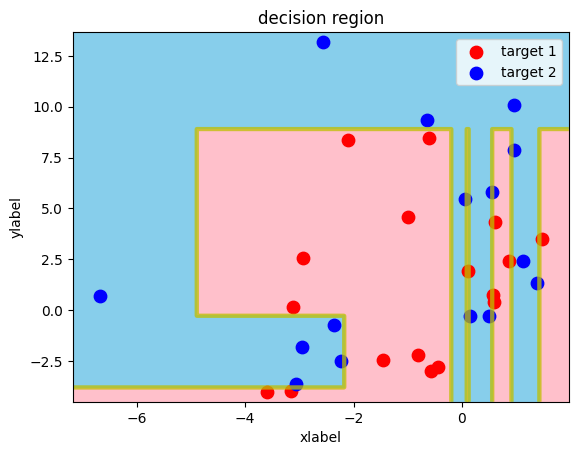

In [13]:
clf_inf = ScratchDecesionTreeClassifierDepthInf(max_depth=None, verbose=True)
clf_inf.fit(X_train, y_train)

y_pred = clf_inf.predict(X_test)
evaluate(y_test, y_pred, 'Decesion Tree')

decision_region(X_train, y_train, clf_inf)

--- Decesion Tree ---
accuracy:  0.75
precision: 1.0
recall:    0.6
f1:        0.7499999999999999
confusion matrix:
[[3 0]
 [2 3]]


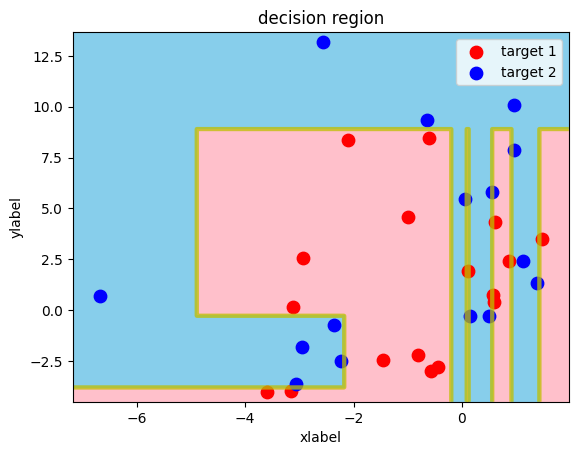

In [14]:
# scikit-learnと比較
clf = tree.DecisionTreeClassifier(max_depth=None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
evaluate(y_test, y_pred, 'Decesion Tree')

decision_region(X_train, y_train, clf)